## Введение

Градиентный спуск - один из самых популярных алгоритмов оптимизации и, безусловно, самый распространенный способ оптимизации моделей машинного обучения. В то же время, каждая современная библиотека, особенно с реализацией градиетного бустинга или библиотеки для глубокого обучения, содержат реализации различных алгоритмов градиетного спуска. Эти библиотеки часто используют алгоритмы оптимизации как черный ящик, посколько трудно найти описание их реализации, объяснение сильных и слабых сторон каждой реализации.

<img src="https://pics.me.me/machine-learning-gradient-descent-machine-learning-machine-learning-behind-the-42177551.png" width="400" height="100">

Преположим, что мы имеем целевую функцию $h_{\theta}(x)$, которую мы хотим оптимизировать. Эта функция зависит от параметров ${\theta}$, мы хотим найти зависимость между параметрами ${\theta}$ и значениями целевой функции $h_{\theta}(x)$. Для поиска зависимости между параметрами ${\theta}$ и целевой функцией, имеем набор данных $(x^{(i)}, y^{(i)})$. Наша задача найти оптимальные значения параметров ${\theta}$, при которых значение функции $h_{\theta}(x)$ будет максимально близко к значениям $y^{(i)}$ из заданного набора данных.

Введем функцию потерь (функцию стоимости), которая будет оценивать близость прогнозных значений к истинным значениям целевой функции. __Например__, такой функцией может быть квадратичная функция потерь, она достаточно простая и ее очень легко оптимизировать, поэтому такой выборк неплохой старт:

__Функция потерь:__ $$J(\theta) = \frac {1}{2m} \sum_{i=1}^{m} (h(\theta)^i - y^i)^2$$

__Градиентный спуск__ - это способ минимизировать целевую функцию $J(\theta)$, которая зависит от параметров $\theta$, путем обновления параметров в направлении, противоположном градиенту целевой функции $\nabla_{\theta}J(\theta)$. Скорость обучения $\eta$ определяет размер шагов, которые мы предпринимаем для достижения минимума. Другими словами, мы следуем по направлению наклона поверхности, созданной целевой функцией, под гору, пока не достигнем долину. 

<img src="https://i.ytimg.com/vi/6iwvtzXZ4Mo/maxresdefault.jpg" width="650" height="100">

Мы работаем с квадратичной функцией потерь. Вычислим градиент функции потерь:

__Функция потерь:__ $$J(\theta) = \frac {1}{2m} \sum_{i=1}^{m} (h(\theta)^i - y^i)^2$$

__Градиент функции потерь:__ $$\frac{\partial{J(\theta)}}{\partial{\theta_i}} = \frac {1}{m} \sum_{i=1}^{m} (h(\theta^i - y^i) X_j^i)$$

__Предположим__, что зависимость в данных __линейная__, и может быть описана уравнением:

$$h_\theta(x) = \theta_0 + \theta_1X$$

Тогда, алгоритм градиетного спуска, выглядит следующим образом:

Мы начинаем со случайного вектора $\theta$, и рассчитываем значение ошибки по формуле выше ($J(\theta)$). В итоге, мы хотим свести к минимуму ошибку, поэтому нам необходимо вычислить следующий шаг (или новое значение $\theta$). Для поиска нового значения $\theta$, нам требуется найти частные производные.

__Изменение параметров:__ 

$$\theta_0 = \theta_0 - \eta (\frac {1}{m}\sum_{i=1}^{m}(h(\theta^i - y^i)X_0^i))$$

$$\theta_1 = \theta_1 - \eta (\frac {1}{m}\sum_{i=1}^{m}(h(\theta^i - y^i)X_1^i))$$

Как только значение функции $J(\theta)$ перестанет уменьшаться, прекратим итерации и зафиксируем оптимальные значения параметров.

In [1]:
from copy import deepcopy
from tqdm import tqdm

import seaborn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
std_error = 30
sample_size = 10000
theta0, theta1 = 2, 15

x = np.random.randn(sample_size)
func_y = lambda x: theta0 + theta1 * x
y = func_y(x) + std_error * np.random.randn(sample_size)

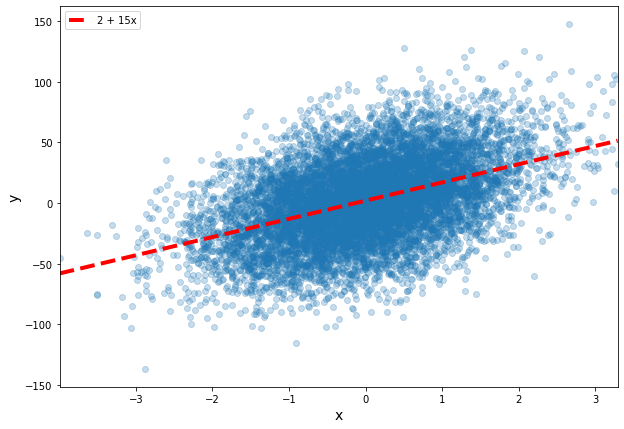

In [3]:
x_plot = np.linspace(x.min(), x.max(), 1000)
y_plot = func_y(x_plot)

fig = plt.figure(figsize=(10, 7))
plt.scatter(x, y, alpha=0.25)
plt.plot(x_plot, y_plot, "r--", linewidth=4, label=f"{theta0} + {theta1}x")
plt.xlim(x.min(), x.max())
plt.xlabel("x", size=14)
plt.ylabel("y", size=14)
plt.legend(loc="best")

In [4]:
def calculate_predictions(theta0, theta1, X):
    """
    Вычисление прогнозов.

    Parameters
    ----------
    theta0: float
        Значение параметра theta0.

    theta1: float
        Значение параметра theta1.

    X: array-like, shape = [n_samples, ]
        Вектор признаков.

    Returns
    -------
    y_pred: array-like, shape = [n_samples, ]
        Вектор прогнозов.

    """
    return theta0 + theta1*X
    

def calculate_cost(theta0, theta1, X, y):
    """
    Вычисление значения функции потерь.

    Parameters
    ----------
    theta0: float
        Значение параметра theta0.

    theta1: float
        Значение параметра theta1.

    X: array-like, shape = [n_samples, n_features]
        Вектор признаков.

    y: array-like, shape = [n_samples, ]
        Вектор целевой переменной.

    Returns
    -------
    cost: float
        Значение функции потерь.

    """
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))

    y_pred = calculate_predictions(theta0, theta1, X)
    cost = np.average((y - y_pred)**2, axis=2)/2

    return cost


def gradient_descent_step(theta, X, y, learning_rate):
    """
    Один шаг градиетного спуска.

    Parameters
    ----------
    theta: array-like
        Массив значений параметров theta.

    X: array-like, shape = [n_samples, n_features]
        Вектор признаков.

    y: array-like, shape = [n_samples, ]
        Вектор целевой переменной.

    learning_rate: float
        Темп обучения.

    Returns
    -------
    updated_theta: array-like
        Обновленный массив значений параметров theta.

    """
    n = len(y)
    y_pred = calculate_predictions(theta[0], theta[1], X)

    updated_theta = deepcopy(theta)
    updated_theta[0] -= learning_rate / n * np.sum((y_pred - y))
    updated_theta[1] -= learning_rate / n * np.sum((y_pred - y) * X)

    return updated_theta

## Gradient Descent

In [5]:
def plot_gradient_descent(cost_history, theta_history, X, y):
    """
    Визуализация результатов градиетного спуска.
    Осуществляется построения четырех графиков, на первом графике
    отображена зависимость значения функции потерь на каждой
    итерации обучения, на втором графике отображена зависимость
    значений параметров theta на каждой итерации обучения, на
    третьем графике отображен процесс изменения коэффициентов
    theta и визуализация получаемой прямой, на четвертом графике
    отображены линии уровня и процесс градиетного спуска

    Parameters
    ----------
    cost_history: list[float]
        Список со значениями функции потерь на каждой
        итерации обучения.

    theta_history: list[np.array]
        Список двумерных массивов со значением параметров theta.

    X: array-like, shape = [n_samples, n_features]
        Вектор признаков.

    y: array-like, shape = [n_samples, ]
        Вектор целевой переменной.

    """
    fig = plt.figure(figsize=(15, 15))
    plt.subplot(221)
    plt.scatter(range(len(cost_history)), cost_history)
    plt.xlabel("n_iteration", size=14)
    plt.ylabel(r"J($\theta$)", size=14)

    plt.subplot(223)
    plt.scatter(x, y, alpha=0.15)
    for num, theta in enumerate(theta_history):
        x_plot = np.linspace(-3, 3, 500)
        y_plot = calculate_predictions(theta[0], theta[1], x_plot)
        if num == 0:
            plt.plot(x_plot, y_plot, color="green", label="baseline", linewidth=5)
        if num == len(theta_history) - 1:
            plt.plot(x_plot, y_plot, color="orange", label="lastline", linewidth=5)
        else:
            plt.plot(x_plot, y_plot, "r--", alpha=.5)
    plt.xlim(x_plot.min(), x_plot.max())
    plt.xlabel("x", size=14)
    plt.ylabel("y", size=14)
    plt.legend(loc="best")

    plt.subplot(222)
    x_plot = range(len(cost_history)+1)
    plt.scatter(x_plot, [theta[0] for theta in theta_history], label=r'$\theta_0$')
    plt.scatter(x_plot, [theta[1] for theta in theta_history], label=r'$\theta_1$')
    plt.xlabel("n_iteration", size=14)
    plt.ylabel(r"$\theta$", size=14)
    plt.legend(loc="best")
    plt.subplot(224)
    plot_cost_function(X, y, theta_history)


def plot_cost_function(X, y, theta_history):
    """
    Визуализация процесса градиетного спуска и
    построение линий уровня.

    Parameters
    ----------
    X: array-like, shape = [n_samples, n_features]
        Вектор признаков.

    y: array-like, shape = [n_samples, ]
        Вектор целевой переменной.

    theta_history: list[np.array]
        Список двумерных массивов со значением параметров theta.

    """
    theta0 = [theta[0] for theta in theta_history]
    theta1 = [theta[1] for theta in theta_history]

    #theta0_grid = np.linspace(-5*min(theta0), max(theta0), 200)
    #theta1_grid = np.linspace(-5*min(theta1), max(theta1), 200)
    theta0_grid = np.linspace(-25, 25, 200)
    theta1_grid = np.linspace(-25, 25, 200)
    cost_grid = calculate_cost(
        theta0_grid[np.newaxis,:,np.newaxis],
        theta1_grid[:,np.newaxis,np.newaxis],
        X, y
    )
    X, Y = np.meshgrid(theta0_grid, theta1_grid)

    theta0, theta1 = theta_history[-1]
    plt.scatter([theta0]*2, [theta1]*2, s=[50, 0], color=['k','w'])
    contours = plt.contour(X, Y, cost_grid, 30)
    plt.clabel(contours)

    for it in range(1, len(theta_history)):
        plt.annotate(
            '', xy=theta_history[it], xytext=theta_history[it-1],
            arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 2},
            va='center', ha='center'
        )

    plt.scatter(*zip(*theta_history), color="black", s=40, lw=0)
    plt.xlim(theta0_grid.min(), theta0_grid.max())
    plt.ylim(theta1_grid.min(), theta1_grid.max())
    plt.xlabel(r'$\theta_0$', size=15)
    plt.ylabel(r'$\theta_1$', size=15)
    plt.title('Cost function', size=15)

Важным параметром в __градиентном спуске__ является размер шагов, определяемый гиперпараметров __скорость обучения (learning rate)__. Если скорость обучения слишком маленькая, тогда алгоритму потребуется сделать слишком много итераций для достижения сходимости, что требует длительного времени.

<img src="https://miro.medium.com/max/1175/1*My1ecdI9oAJ1UPPNZRx03g@2x.png
" width="600" height="100">

С другой стороны, если скорость обучения слишком высокая, тогда мы можем перескочить оптимальное значение и уйти в другую сторону, в худшую точку, чем предыдущая. Эта особенность способна слелать алгоритм расходящимся, что приведет к получению постоянно увеличивающихся значений функции потерь и неудачному решению задачи.

<img src="https://miro.medium.com/proxy/1*VBGQ8-ES4Npepc-TvjVd_g.png" width="600" height="100">

In [6]:
n_iterations, learning_rate = 100, 0.1
theta_history, cost_history = [100*np.random.rand(2)], []

for it in tqdm(range(n_iterations)):
    last_theta = theta_history[-1]
    current_theta = gradient_descent_step(
        theta=last_theta, X=x, y=y, learning_rate=learning_rate
    )
    theta_history.append(current_theta)
    cost_history.append(calculate_cost(current_theta[0], current_theta[1], X=x, y=y))

100%|██████████| 100/100 [00:00<00:00, 7124.57it/s]


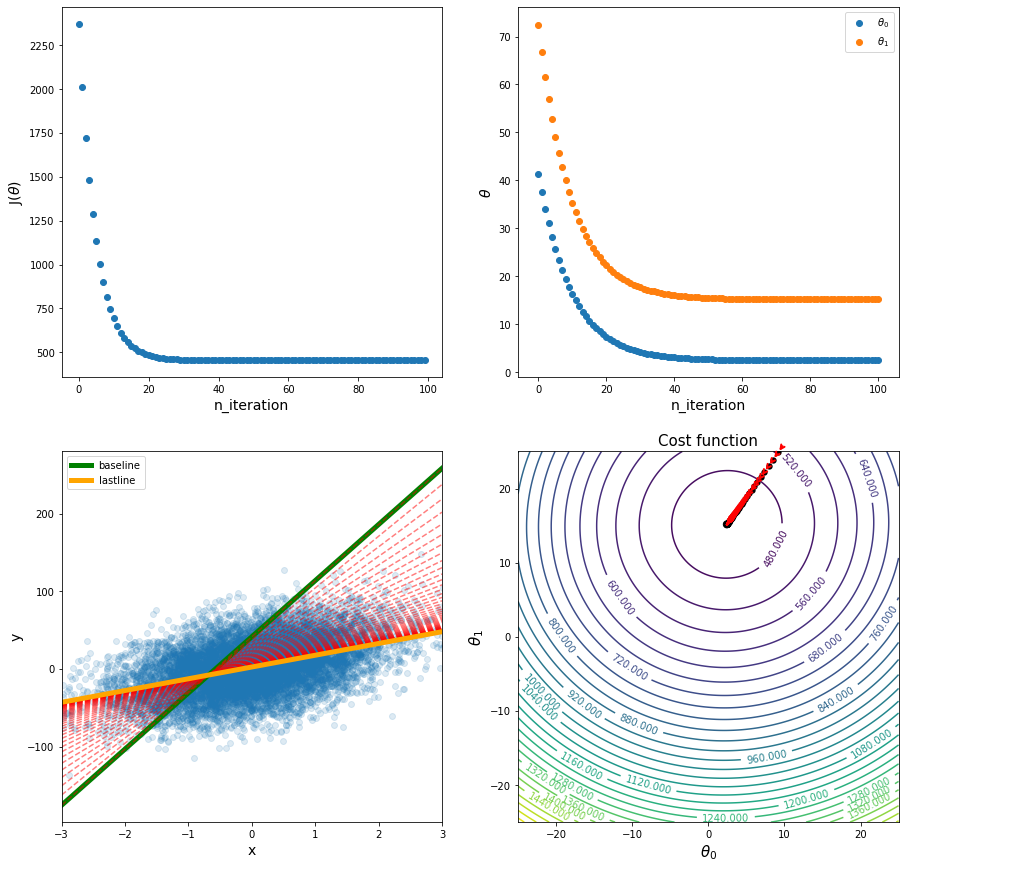

In [7]:
plot_gradient_descent(
    cost_history=cost_history,
    theta_history=theta_history,
    X=x, y=y
)

Не все функции потерь могут быть использованы при градиетном спуске. Могут существовать впадины, выступы, плато и самые разнообразные участки нерегулярной формы, которые крайне затрудняют сходимость к минимуму. На рисунке продемонстрированы две главные проблемы с __градиетным спуском__: если случайная инициализация параметров начинает алгоритм слева, то он сойдется в точке __локального минимума__, который не настолько хорош, как __глобальный минимум__. Если алгоритм начнется справа, тогда мы потратим очень много времени на пересечении плато, и в случае слишком раннего прекращения обучения, глобальный минимум никогда не будет достигнут.

<img src="https://im0-tub-ru.yandex.net/i?id=e555135ddf742890d0f381632b19c594&n=13" width="600" height="100">

К счатью, средневадратичная функция потерь (MSE) является __выпусклой функцией__, то есть если выбрать либые две точки на кривой, то соединяющий их отрезок прямой никогда не пересекает кривую. Отсюда следует, что локальные минимумы, отсутствует, а есть только один глобальный минимум. Она также представляет собой __непрерывную функцию__ с наклоном, который никогда не изменяется. Упомянутые два фактора имеют большое значение: градиентный спуск __гарантированно__ подбирется к глобальному минимуму достаточно близко, если мы проделаем достаточное количество итераций и темп обучения не будет очень большим.

<img src="https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_0406.png" width="600" height="100">

Не всегда функция потерь имеет форму чаши. Она может иметь форму продолговатой чаши, если масштабы признаков сильно отличаются. На рисунке, представлен градиентный спуск на наборе данных, где признаки 1 и 2 имеют одинаковый масштаб (слева), и на наборе данных, где признак 1 имеет гораздо меньшие значения, чем признак 2. На левой картинке, алгоритм градиетного спуска устремляется прямо к минимуму, из-за чего достигает его быстро, а на картинке справа, алгоритм сначала двигается в нправлении, которое практически перпендикулярно направлению глобального минимуму, и заканчивается направлением практически в плоском направлении. В итоге, минимум достигается, но за большее количество итераций.

__Как выбрать количество итераций?__ Если оно слишком мало, тогда мы будем далеко от оптимального решения, когда алгоритм остановится. Если оно слишком велико, то мы будем понапрасту растрачивать время наряду с тем, что параметры модели больше не изменяются. Просто решение предусматривает установку очень большого числа итераций, но прекращение работы алгоритма, как только вектор-градиента становится очень маленьким, то есть норма меньше заданного допуска. Это работает хорошо, потому что градиетный спуск почти достиг минимума в таком случае.

## Скорость сходимости

Когда функция потерь выпуклая и ее наклон резко не изменяется, как в случае с MSE, то градиентый спус с фиксированной скоростью обучению в итоге сойдется к оптимальному решению, но, скорее всего, нам придется достаточно долго подождать. В зависимости от формы функции потерь он может требовать $O(\frac{1}{\epsilon})$ итераций для достижения оптимума внутри диапазона $\epsilon$, то есть, если мы разделим допуск на 10 для получения более точного решения, тогда алгоритму потребуется выполнить в 10 раз больше итераций.

## Stochastic gradient descent

Существует три варианта градиентного спуска, которые отличаются тем, сколько данных мы используем для вычисления градиента целевой функции. В зависимости от объема данных мы делаем компромисс между точностью обновления параметра и временем, которое требуется для выполнения обновления. Обычно, мы имеем дело с матрицей Х достаточно большого объема, и при использовании градиентного спуска, основная проблема заключается в использовании полного обучающего набора для вычисления градиента на каждом шаге, что делает его очень медленным, в случае большого обучающего набора данных. Противоположный подход, __стохастический градиетный спуск__, на каждом шаге просто выбирает из обучающего набора случайный образец и вычисляет градиентны на основе только этого единственного образца. Очевидно, что алгоритм становится гораздо быстрее, на каждой итерации ему приходится оперировать совсем маленьким набором данных, появляется возможность проводить обучение на гигантских обучающих наборах, потому что на каждой итерации в памяти должен находится только один обучающий пример.

С другой стороны, из-за своей стохастической природы, этот алгоритм гораздо менее устойчивый, чем градиетный спуск: вместо умеренного понижения вплоть до достижения минимума функции потерь, функция потерь будет изменяться скачкообразно вверх и вниз, понижаясь только в среднем. Со временем, алгоритм будет очень близок к минимуму, но как только он туда доберется, скачкообразные изменения продолжатся, этот процесс никогда не прекратится. Таким образом, после окончания алгоритма, финальные значения параметров оказываются хорошими, но не оптимальными. Когда функция потерь - сложная, то это может помочь алгоритму выбраться из локальных минимумов, так что у стохастического градиетного спуска есть боьлше шансов отыскать глобальный минимум, чем у градиентного спуска.

In [8]:
n_iterations, learning_rate = 500, 0.1
theta_history, cost_history = [100*np.random.rand(2)], []

for it in tqdm(range(n_iterations)):
    idx = np.random.randint(0, len(y))
    last_theta = theta_history[-1]
    current_theta = gradient_descent_step(
        theta=last_theta, X=x[[idx]], y=y[[idx]], learning_rate=learning_rate
    )
    theta_history.append(current_theta)
    cost_history.append(calculate_cost(current_theta[0], current_theta[1], X=x, y=y))

100%|██████████| 500/500 [00:00<00:00, 10825.07it/s]


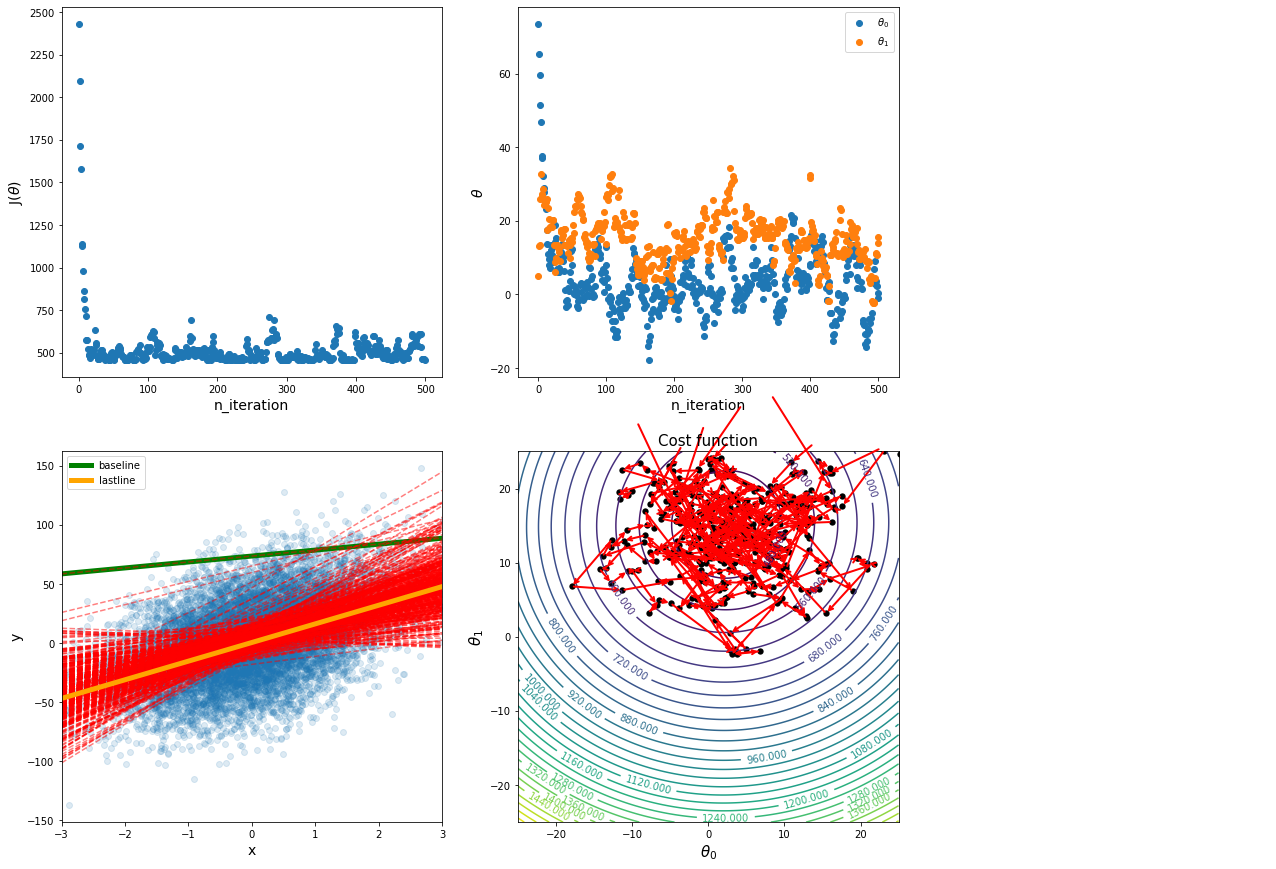

In [9]:
plot_gradient_descent(
    cost_history=cost_history,
    theta_history=theta_history,
    X=x, y=y
)

Таким образом, стохастический градиетный спуск хорош для избегания локальных минимумов, но плох потому что, алгоритм может никогда не достигнуть минимума. Одни из решений такой проблемы может быть постепенное снижение скорости обучения. Шаги начинаются с больших, которые помогут на первых итерациях добиться большого прогресса, и избегать локальные минимумы, а затем становятся все меньше и меньше, позволяя алгоритму остановится на глобальном минимуме. Такой процесс называется __имитацией отжига__, посколько имеет сходство с процессом закалки стали в металлургии, когда распралвенный металл медленно охлаждается. Функция, которая определяет скорость обучения на каждой итерации, называется графиком обучения. Если скорость будет снижаться слишком быстро, то можно застрять в локальном минимуме, или даже остановится на половине пути. Если скорость снижается слишком медленно, то мы можем долго прыгать возле минимума и в конечном счете получить квазиоптималььное решение в случае прекращения обучения слишком рано.

In [10]:
def learning_schedule(t, t_start = 1.):
    """
    График обучения.

    Parameters
    ----------
    t: int
        Номер итерации обучения + 1.

    t_start: float
        Константа для управления скоростью сходимости.

    Returns
    -------
    current_lr: float
        Скорость обучения на текущей итерации.

    """
    return t_start / (t + t_start)

In [11]:
n_iterations = 500
theta_history, cost_history = [100*np.random.rand(2)], []
lr_history = []

for it in tqdm(range(n_iterations)):

    idx = np.random.randint(0, len(y))
    learning_rate = learning_schedule(it+1)

    last_theta = theta_history[-1]
    current_theta = gradient_descent_step(
        theta=last_theta, X=x[[idx]], y=y[[idx]], learning_rate=learning_rate
    )
    lr_history.append(learning_rate)
    theta_history.append(current_theta)
    cost_history.append(calculate_cost(current_theta[0], current_theta[1], X=x, y=y))

100%|██████████| 500/500 [00:00<00:00, 10039.55it/s]


Text(0.5, 1.0, 'Зависимость скорости обучения от номера итерации')

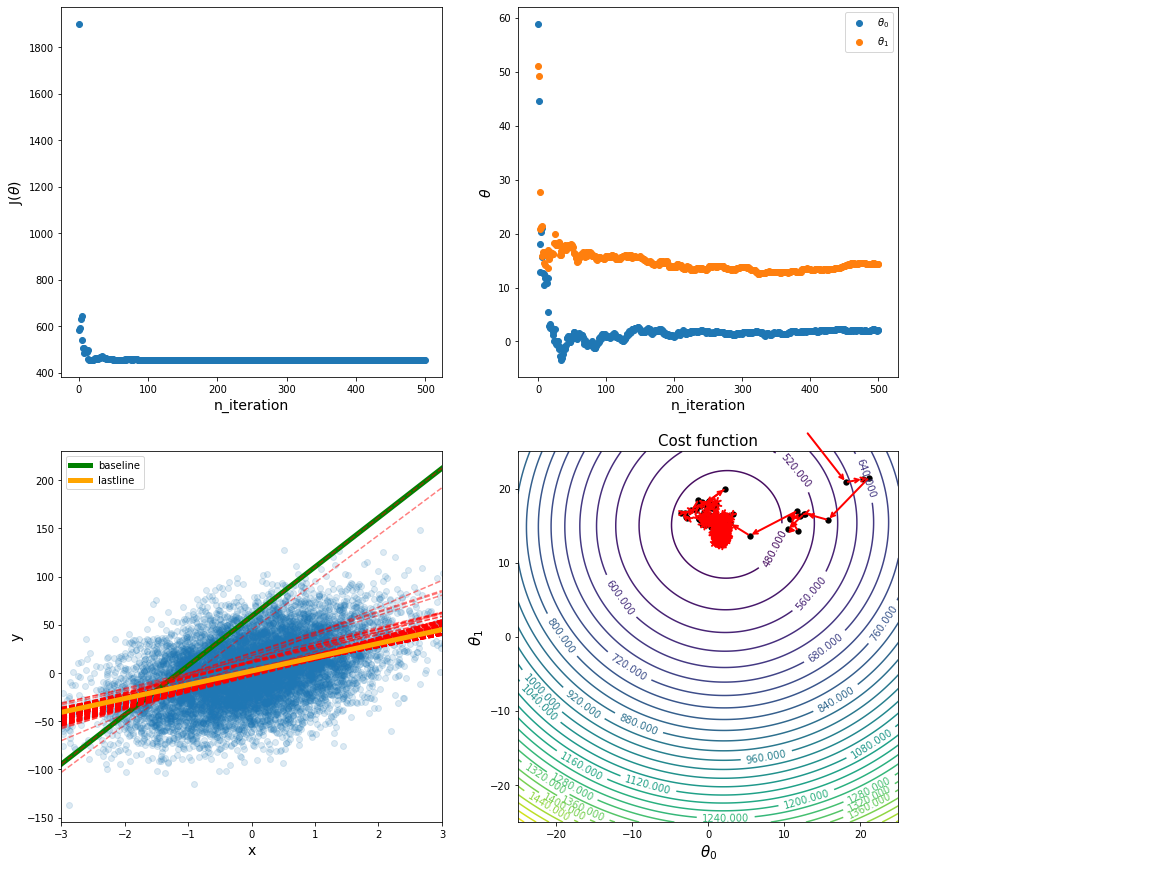

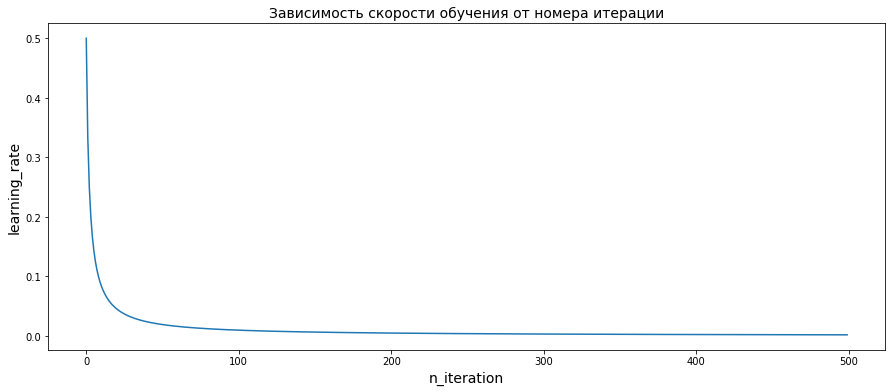

In [12]:
plot_gradient_descent(
    cost_history=cost_history,
    theta_history=theta_history,
    X=x, y=y
)

fig = plt.figure(figsize=(15, 6))
plt.plot(lr_history)
plt.xlabel("n_iteration", size=14)
plt.ylabel("learning_rate", size=14)
plt.title("Зависимость скорости обучения от номера итерации", size=14)

__Важно понимать__, так как примеры для вычисления градиетна выбираются случайно, некоторые из них могут быть выбраны несколько раз за эпоху, тогда как другие могут быть не выбраны вообще. Если требуется гарантировать проход алгоритма по каждому примеру, то можно отсортировать обучающую выборку и пройти по ней по порядку. Однако, такой подход, на практике, работает хуже, сходимость достгиается за большое количество итераций.

## Mini-batch gradient descent

Последняя базовая версия градиетного спуск называется __mini-batch градиетный спуск__. Его идея достаточно простая. На каждом шагу вместо вычисления градиетнов на основе полного обучающего набора, как в градиетном спуск, или только одного образца, как в стохастическом градиетном спуске, mini-batch градиетный спуск вычисляет градиетны на небольших случайных наборах, которы называются __mini-batch__. Главное превосходство такой реализации, в том, что мы получаем улучшение производительности от аппаратной оптимизации матричных операций, особенно при использовании GPU. Эта реализация градиетного спуска гораздо более устойчивая по сравнению со стохастическим градиетным спусков, но, с другой стороны, ему труднее уйти от локальных минимумов. Размер батча обычно варьируется от 32 до 256 наблюдений.

In [13]:
n_iterations, mini_batch = 100, 32
theta_history, cost_history = [100*np.random.rand(2)], []
lr_history = []

for it in tqdm(range(n_iterations)):

    idx = np.random.randint(0, len(y), size=mini_batch)
    learning_rate = learning_schedule(it+1)

    last_theta = theta_history[-1]
    current_theta = gradient_descent_step(
        theta=last_theta, X=x[[idx]], y=y[[idx]], learning_rate=learning_rate
    )
    lr_history.append(learning_rate)
    theta_history.append(current_theta)
    cost_history.append(calculate_cost(current_theta[0], current_theta[1], X=x, y=y))

  0%|          | 0/100 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
100%|██████████| 100/100 [00:00<00:00, 5859.28it/s]


Text(0.5, 1.0, 'Зависимость скорости обучения от номера итерации')

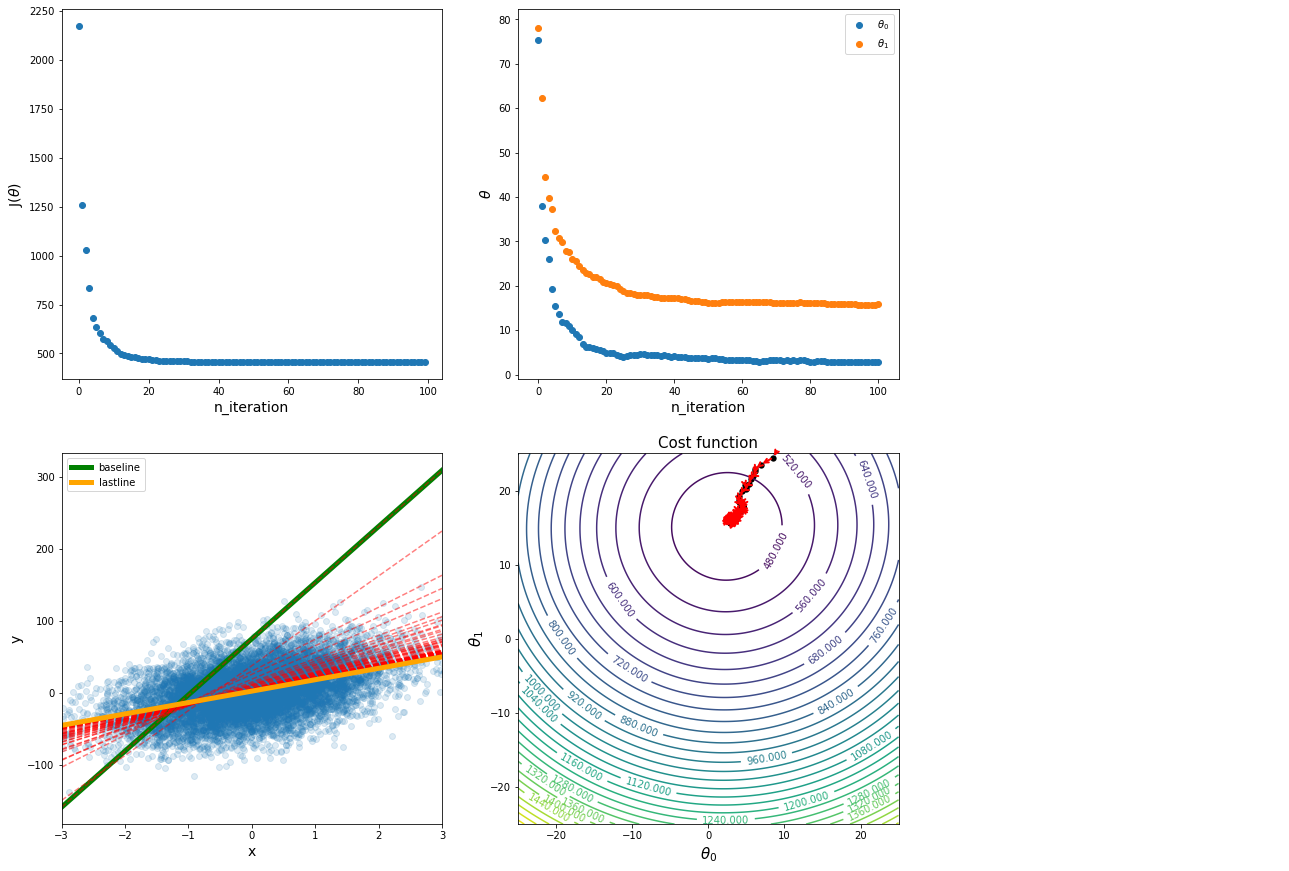

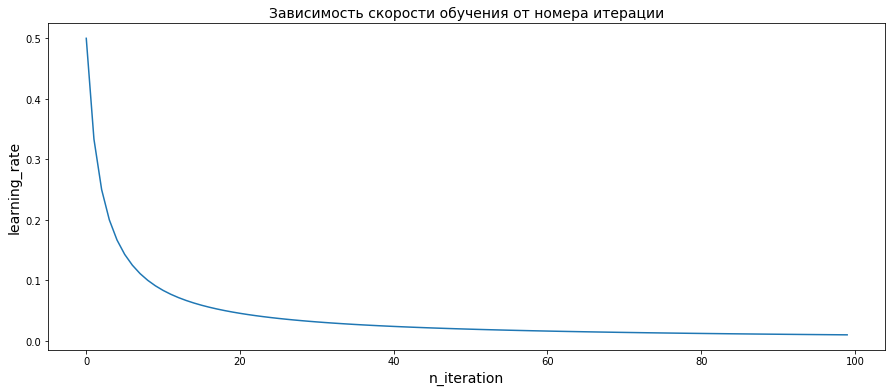

In [14]:
plot_gradient_descent(
    cost_history=cost_history,
    theta_history=theta_history,
    X=x, y=y
)

fig = plt.figure(figsize=(15, 6))
plt.plot(lr_history)
plt.xlabel("n_iteration", size=14)
plt.ylabel("learning_rate", size=14)
plt.title("Зависимость скорости обучения от номера итерации", size=14)

## Проблемы

Все указанные версии градиетного спуска, на реальных задачах, не гарантируют хорошей сходимости, посколько возникает несколько проблем, которые необходимо решить:

* сложно выбрать правильную скорость обучения. Слишком маленькая скорость обучения приводит к мучительно медленной сходиомтис, в то время, ка кслишком высокая скорость обучения может препятствовать сходимости и вызывать калебания функции потерь вокруг минимума или вообще расхождение алгоритма.

* Стратегии снижения скорости обучения пытаются скорретировать скорость обучения во время обучения, например, отжиг. Это работает лучше, чем константная скорость обучения, однако, стратегия снижения скорости обучения должна быть определена заранее и не может быть адаптирована в процессе обучения к особенностям конкретного набора данных. Кроме того, одинаковая скорость обучения применяется ко всем компонентам вектора параметров. Иногда, из-за особенностей данных, требуется по-разному изменять компоненты вектора параметров.

* При оптимизации очень невыпуклых функций (что особенно актуально в глубоком обучении), общей проблемой является, частое поадание в многочисленные субоптимальные локальные минимумы. Часто, трудности возникают не из-за локальных минимумов, а из-за попадания в седловую точку, которые обычно окружены областью с одинаковым значением ошибки, что делает задачу выхода из седловой точки, сложной для алгоритма, поскольку градиент во всех измерениях близок к нулю.

## Momentum SGD

<img src="https://ruder.io/content/images/2015/12/without_momentum.gif" width="200" height="100">

Стохастический градиетный спуск испытывает затруднения при навигации по ущельям, то есть в тех областях, где поверхность изгибается гораздо более круто в одном измерении, чем в другом, что характерно для локальных оптимумов. С таком случае, алгоритм колеблется через склоны оврага, в то же время, совершая только колеблющееся движение вдоль дна к локальному оптимуму, как на рисунке сверху.

<img src="https://ruder.io/content/images/2015/12/with_momentum.gif" width="200" height="100">

Momentum - метод, который позволяет ускорить стохастический градиентный спуск в соответствующем направлении и гасит колебания, как это видно на рисунке сверху. Это достигается за счет добавления $\gamma$, который учитывает изменения градиента на предыдущих шагах.

$$v_t = \gamma v_{t-1} + \eta\nabla_{\eta}J(\theta)$$

$$\theta = \theta - v_t$$

Параметр $\gamma$ регулирует вес, с которым учитывать значения градиентов на предыдущиз шагах. Обычно, по умолчанию, он равен 0.9. Чем больше значение параметра - тем больший вес преобретают градиетны с предыдущих итераций. Вектор импульса увеличивается для измерений, градиенты которых указывают в одном и том же направлении, и уменьшается для градиентов, которые меняют направления. В результате мы получаем более быструю сходимость и уменьшаем колебания.

In [23]:
def momentum_step(theta, X, y, learning_rate, momentum, gamma = 0.8):
    """
    Один шаг Momentum SGD.

    Parameters
    ----------
    theta: array-like
        Массив значений параметров theta.

    X: array-like, shape = [n_samples, n_features]
        Вектор признаков.

    y: array-like, shape = [n_samples, ]
        Вектор целевой переменной.

    gamma: float
        Вес для предыдущих значений градиента.

    learning_rate: float
        Темп обучения.

    momentum: float
        Значение вектора моментов.

    Returns
    -------
    updated_theta: array-like
        Обновленный массив значений параметров theta.

    updated_momentum: array-like
        Обновленный массив значений вектора моментов.

    """
    n = len(y)
    y_pred = calculate_predictions(theta[0], theta[1], X)

    updated_theta = deepcopy(theta)
    updated_momentum = deepcopy(momentum)

    updated_momentum[0] = gamma * updated_momentum[0] + learning_rate * np.sum((y_pred - y))
    updated_momentum[1] = gamma * updated_momentum[1] + learning_rate * np.sum((y_pred - y) * X)
    updated_theta[0] -= updated_momentum[0]
    updated_theta[1] -= updated_momentum[1]

    return updated_theta, updated_momentum

In [24]:
learning_rate, n_iterations, mini_batch = 0.01, 100, 32
momentum_history, theta_history, cost_history = [100*np.random.rand(2)], [100*np.random.rand(2)], []

for it in tqdm(range(n_iterations)):

    idx = np.random.randint(0, len(y), size=mini_batch)

    last_theta, last_momentum = theta_history[-1], momentum_history[-1]
    current_theta, current_momentum = momentum_step(
        theta=last_theta, momentum=last_momentum, X=x[[idx]], y=y[[idx]], learning_rate=learning_rate,
    )
    theta_history.append(current_theta)
    momentum_history.append(current_momentum)
    cost_history.append(calculate_cost(current_theta[0], current_theta[1], X=x, y=y))

  0%|          | 0/100 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
100%|██████████| 100/100 [00:00<00:00, 6829.67it/s]


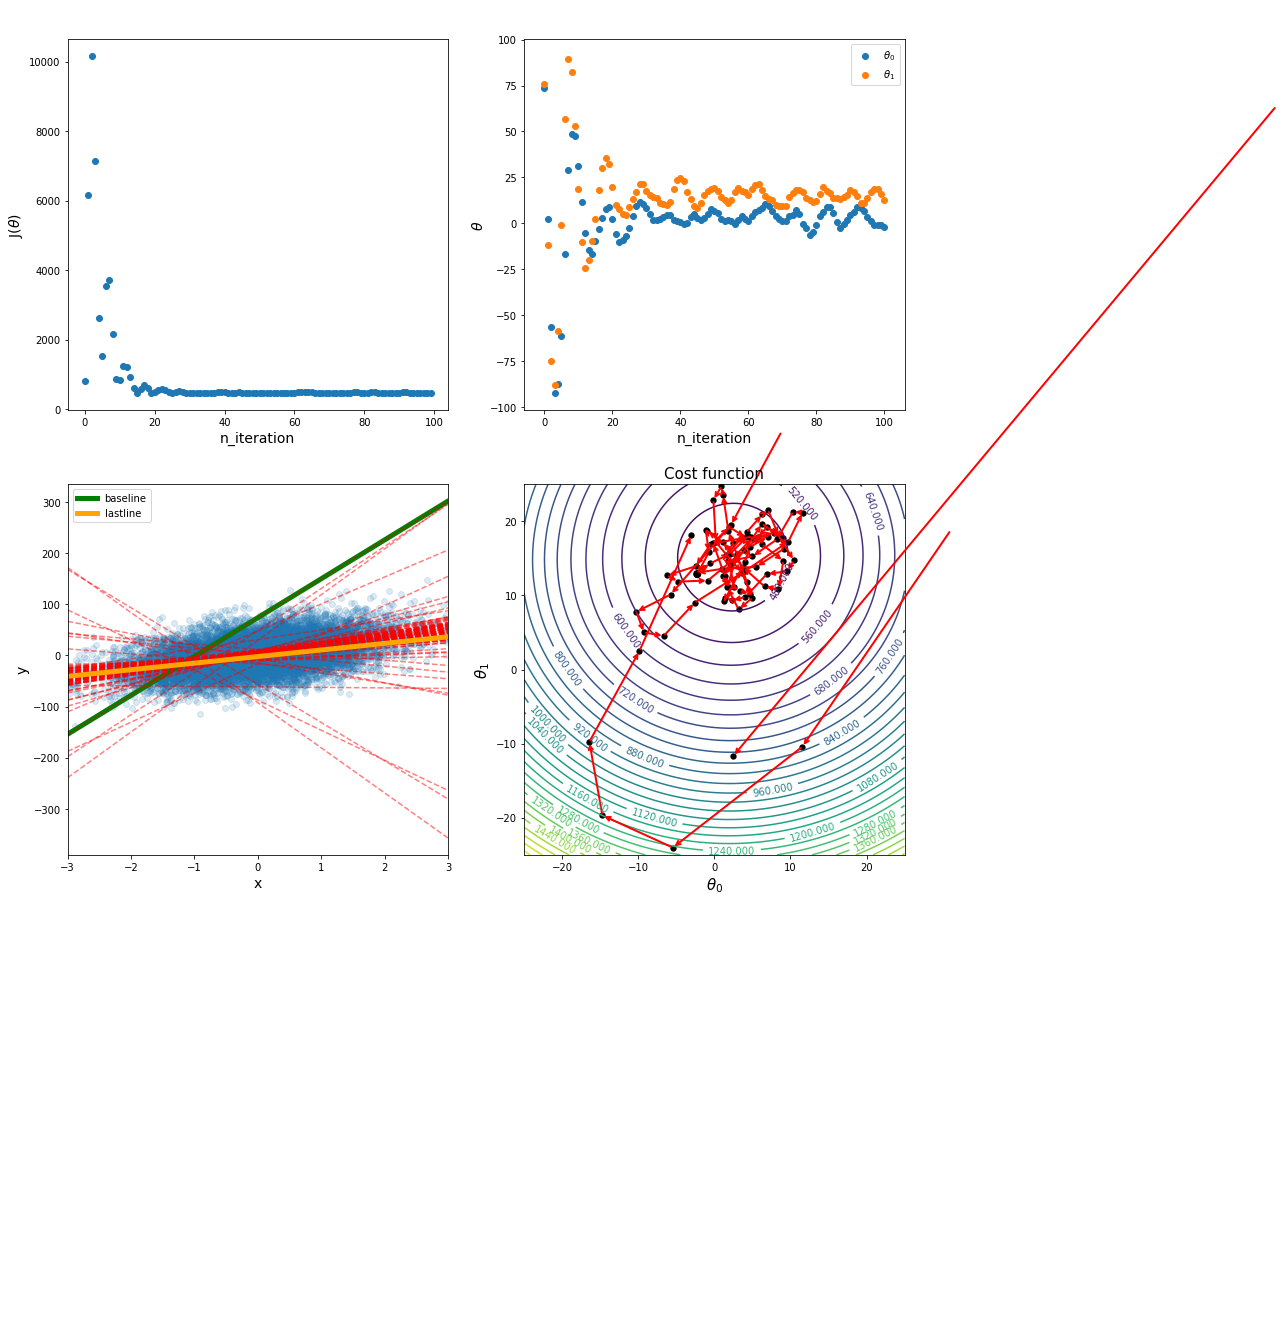

In [25]:
plot_gradient_descent(
    cost_history=cost_history,
    theta_history=theta_history,
    X=x, y=y
)

## AdaGrad

AdaGrad - это алгоритм оптимизации на основе градиента, который адаптирует скорость обучения к параметрам, выполняя небольшие шаги обновления для параметров, связанных с часто встречающимися функциями и более крупные обновления для параметров, связанных с нечастыми функциями. По этой причине он хорошо подходит при работе с разреженными данными. Ранее мы выполняли обновления параметров сразу для каждого значения, используя одну и ту же скорость обучения $\eta$. Алгоритм AdaGrad использует разный темп обучения для каждого параметра $\theta_i$, на каждой итерации. 